In [ ]:
#Mount our google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
url = '1hiayuEMSil4WUD8Z43dNP_O_ZrlsO3Dg'
gdd.download_file_from_google_drive(file_id = url,dest_path='./merged_dataset.csv',unzip=True)

Unzipping...

/usr/local/lib/python3.7/dist-packages/google_drive_downloader/google_drive_downloader.py:78: UserWarning: Ignoring `unzip` since "1hiayuEMSil4WUD8Z43dNP_O_ZrlsO3Dg" does not look like a valid zip file
  warnings.warn('Ignoring `unzip` since "{}" does not look like a valid zip file'.format(file_id))


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/merged_dataset.csv')
df.head(5)

,Unnamed: 0,label,full_text
0,0,0,!!! rt @mayasolovely: woman complain clean hou...
1,1,1,!!!!! rt @mleew17: boy dat cold...tyga dwn bad...
2,2,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3,3,1,!!!!!!!!! rt @c_g_anderson: @viva_bas look lik...
4,4,1,!!!!!!!!!!!!! rt @shenikaroberts: shit hear mi...


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM,Bidirectional,GRU
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.constraints import maxnorm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

tweets = list(df['full_text'])
labels= list(df['label'])
print('labels: ',labels)

# Feature extraction
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# integer encode the documents
sequences = tokenizer.texts_to_sequences(tweets)

# pad documents to a max length of 14 words
maxlen = 14
X = pad_sequences(sequences, maxlen=maxlen)
y = to_categorical(labels, 2)
print('X shape',X.shape)
print('y shape',y.shape)
print('X',X)
print('y',y)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
print('training dataset len:', len(X_train))
print('testing dataset len:', len(X_test))
print('X train',X_train)
print('y train',y_train)
print('X test',X_test)
print('y test',y_test)

# Prepare hyperparameters
vocab_size = len(word_index)+1
output_dim = 32

# LSTM
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = output_dim, input_length = maxlen))
model.add(Bidirectional(GRU(64)))
model.add(Dropout(0.2))
# model.add(Bidirectional(GRU(64)))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics = ['accuracy'])
warnings.filterwarnings("ignore")

labels:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 14, 32)            1574560   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              37632     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 1,612,450
Trainable params: 1,612,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import time
start = time.time()

# Fit the model to the training set
lstm_hist = model.fit(X_train, y_train, epochs=10, validation_split=0.3)
# Final evaluation of the model
warnings.filterwarnings("ignore")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
warnings.filterwarnings("ignore")
end = time.time()
total = (end-start)/60
print('Training duration(minutes): {}'.format(total))

Epoch 1/10
1034/1034 [==============================] - 41s 35ms/step - loss: 0.6697 - accuracy: 0.6423 - val_loss: 0.6527 - val_accuracy: 0.6500
Epoch 2/10
1034/1034 [==============================] - 37s 36ms/step - loss: 0.6500 - accuracy: 0.6445 - val_loss: 0.6448 - val_accuracy: 0.6500
Epoch 3/10
1034/1034 [==============================] - 37s 36ms/step - loss: 0.6456 - accuracy: 0.6445 - val_loss: 0.6404 - val_accuracy: 0.6500
Epoch 4/10
1034/1034 [==============================] - 41s 40ms/step - loss: 0.6392 - accuracy: 0.6445 - val_loss: 0.6326 - val_accuracy: 0.6500
Epoch 5/10
1034/1034 [==============================] - 37s 36ms/step - loss: 0.6268 - accuracy: 0.6445 - val_loss: 0.6150 - val_accuracy: 0.6500
Epoch 6/10
1034/1034 [==============================] - 59s 57ms/step - loss: 0.5982 - accuracy: 0.6446 - val_loss: 0.5792 - val_accuracy: 0.6507
Epoch 7/10
1034/1034 [==============================] - 41s 39ms/step - loss: 0.5581 - accuracy: 0.6541 - val_loss: 0.5483 -

In [ ]:
# Save the LSTM model
model.save('lstm.h5')

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix,f1_score,classification_report
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()

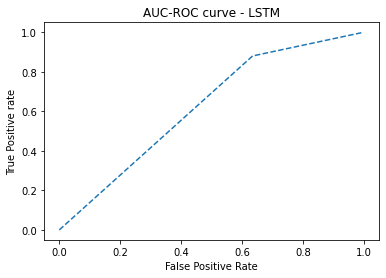

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow import keras

lstm_model = keras.models.load_model('./lstm.h5')
y_pred = np.argmax(lstm_model.predict(X_test),axis=-1)
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(np.argmax(y_test,axis=-1), y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, linestyle='--', label='LSTM (auc = %0.3f)' % auc_keras)
plt.title('AUC-ROC curve - LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
auc_score = roc_auc_score(np.argmax(y_test,axis=-1), y_pred)

True positive =  9353
False positive =  14579
False negative =  4855
True negative =  38709




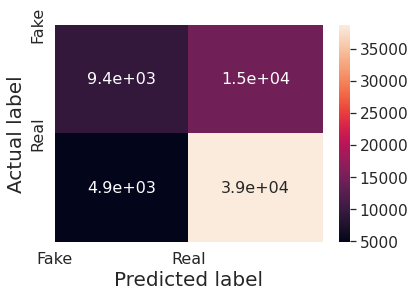

f1 score (LSTM) : 0.7993433279643167 

Classification report : 
              precision    recall  f1-score   support

           0       0.66      0.39      0.49     23932
           1       0.73      0.89      0.80     43564

    accuracy                           0.71     67496
   macro avg       0.69      0.64      0.64     67496
weighted avg       0.70      0.71      0.69     67496



In [ ]:
from tensorflow import keras
lstm_model = keras.models.load_model('./lstm.h5')

print_confusion_matrix(labels, np.argmax(lstm_model.predict(X),axis=-1))
f1 = f1_score(labels, np.argmax(lstm_model.predict(X),axis=-1))
cr = classification_report(labels, np.argmax(lstm_model.predict(X),axis = -1))
print(f'f1 score (LSTM) : {f1} \n')
print(f'Classification report : \n{cr}')